**NAME**: **ANURAG PRATAP SINGH**
**221020411** **(DSAI)**

**1. Apply the CNN architecture (ResNet, Vgg, DenseNet) for any classification task and compare the outputs of all architecture to the above dataset.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50, VGG16, DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Function to create a model
def create_model(base_model):
    x = base_model.output
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the layers except the last Dense layers
    for layer in base_model.layers:
        layer.trainable = False

    return model

# List of models to compare
models = {
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3)),
    "VGG16": VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3)),
    "DenseNet121": DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
}

# Training and evaluating the models
results = {}
for model_name, base_model in models.items():
    print(f"Training {model_name}...")
    model = create_model(base_model)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

    print(f"Evaluating {model_name}...")
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=-1)
    y_true = y_test.argmax(axis=-1)

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred_classes))

    results[model_name] = model.evaluate(x_test, y_test, verbose=0)

# Compare the results
for model_name, result in results.items():
    print(f"{model_name} - Loss: {result[0]}, Accuracy: {result[1]}")



29084464/29084464 [==============================] - 0s 0us/step
Training ResNet50...
Epoch 1/5
782/782 [==============================] - 69s 84ms/step - loss: 1.3253 - accuracy: 0.5588 - val_loss: 1.1748 - val_accuracy: 0.5842
Epoch 2/5
782/782 [==============================] - 64s 82ms/step - loss: 1.0198 - accuracy: 0.6363 - val_loss: 1.1351 - val_accuracy: 0.6068
Epoch 3/5
782/782 [==============================] - 64s 82ms/step - loss: 0.9038 - accuracy: 0.6788 - val_loss: 1.1282 - val_accuracy: 0.6165
Epoch 4/5
782/782 [==============================] - 64s 82ms/step - loss: 0.7986 - accuracy: 0.7159 - val_loss: 1.1522 - val_accuracy: 0.6166
Epoch 5/5
782/782 [==============================] - 64s 82ms/step - loss: 0.6953 - accuracy: 0.7510 - val_loss: 1.2299 - val_accuracy: 0.6156
Evaluating ResNet50...
313/313 [==============================] - 17s 51ms/step
Classification Report for ResNet50:
              precision    recall  f1-score   support

           0       0.64     

**2. Demonstrate the results with various learning rates.**

11490434/11490434 [==============================] - 0s 0us/step

Training with learning rate: 0.01
Epoch 1/5
1875/1875 - 5s - loss: 0.2361 - accuracy: 0.9310 - val_loss: 0.1726 - val_accuracy: 0.9518 - 5s/epoch - 3ms/step
Epoch 2/5
1875/1875 - 4s - loss: 0.1597 - accuracy: 0.9556 - val_loss: 0.1815 - val_accuracy: 0.9498 - 4s/epoch - 2ms/step
Epoch 3/5
1875/1875 - 4s - loss: 0.1441 - accuracy: 0.9605 - val_loss: 0.1855 - val_accuracy: 0.9581 - 4s/epoch - 2ms/step
Epoch 4/5
1875/1875 - 4s - loss: 0.1325 - accuracy: 0.9656 - val_loss: 0.1745 - val_accuracy: 0.9620 - 4s/epoch - 2ms/step
Epoch 5/5
1875/1875 - 4s - loss: 0.1271 - accuracy: 0.9673 - val_loss: 0.1988 - val_accuracy: 0.9623 - 4s/epoch - 2ms/step

Training with learning rate: 0.001
Epoch 1/5
1875/1875 - 5s - loss: 0.2600 - accuracy: 0.9249 - val_loss: 0.1267 - val_accuracy: 0.9627 - 5s/epoch - 3ms/step
Epoch 2/5
1875/1875 - 5s - loss: 0.1121 - accuracy: 0.9670 - val_loss: 0.1037 - val_accuracy: 0.9667 - 5s/epoch - 3ms/step
Epo

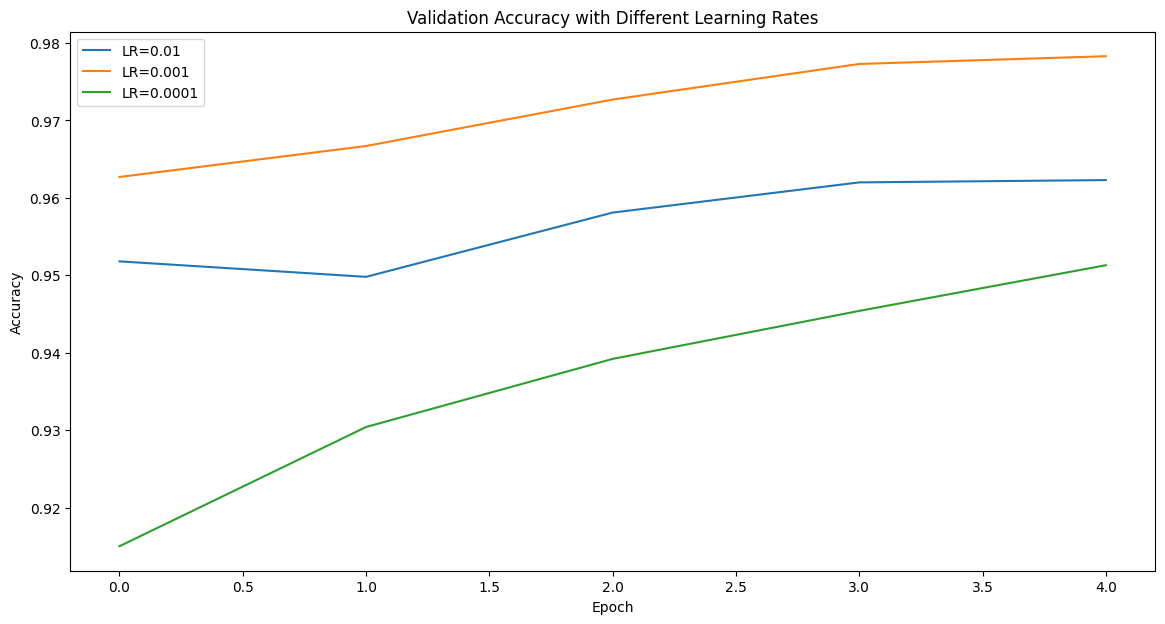

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define a simple neural network model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Learning rates to try
learning_rates = [0.01, 0.001, 0.0001]

# Training the model with different learning rates
histories = {}
for lr in learning_rates:
    model = create_model()
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    print(f"\nTraining with learning rate: {lr}")
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=2)
    histories[lr] = history

# Plotting the results
plt.figure(figsize=(14, 7))

for lr, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'LR={lr}')

plt.title('Validation Accuracy with Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**3. Demonstrate the results with various Activation functions.**

Training with relu activation function...
Training with sigmoid activation function...
Training with tanh activation function...
Training with softmax activation function...


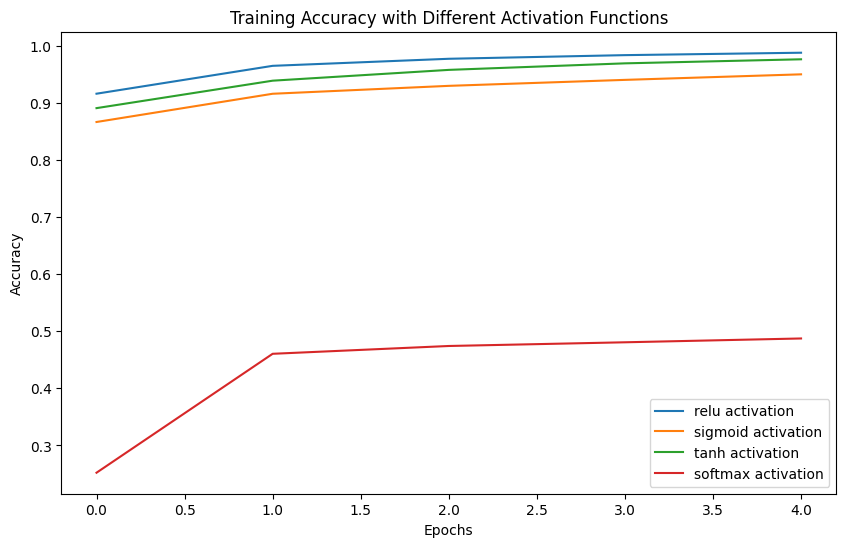

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Flatten the images
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# List of activation functions to demonstrate
activation_functions = ['relu', 'sigmoid', 'tanh', 'softmax']

# Dictionary to store the history of each model
histories = {}

for activation in activation_functions:
    print(f"Training with {activation} activation function...")

    # Build the model
    model = models.Sequential()
    model.add(layers.Dense(512, activation=activation, input_shape=(28 * 28,)))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2, verbose=0)

    # Store the history
    histories[activation] = history

# Plot the results
plt.figure(figsize=(10, 6))

for activation in activation_functions:
    plt.plot(histories[activation].history['accuracy'], label=f'{activation} activation')

plt.title('Training Accuracy with Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**4. Demonstrate the results with all possible evaluation criteria.**

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0

Confusion Matrix:
 [[19  0]
 [ 0 26]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



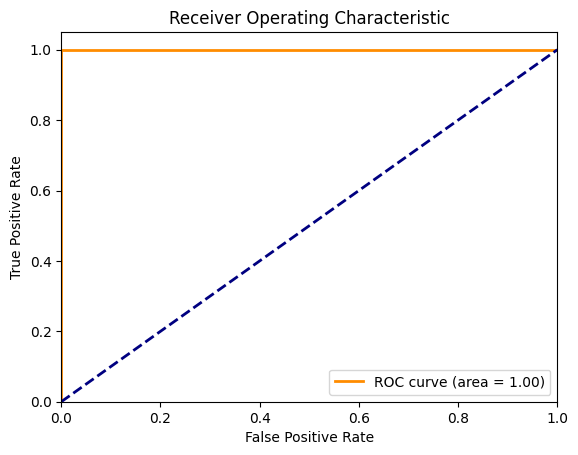

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Convert to binary classification for simplicity
# We will classify if the species is 'Iris-setosa' or not
y = np.where(y == 0, 0, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**5. Demonstrate the learning results in all possible visualizing ways.**

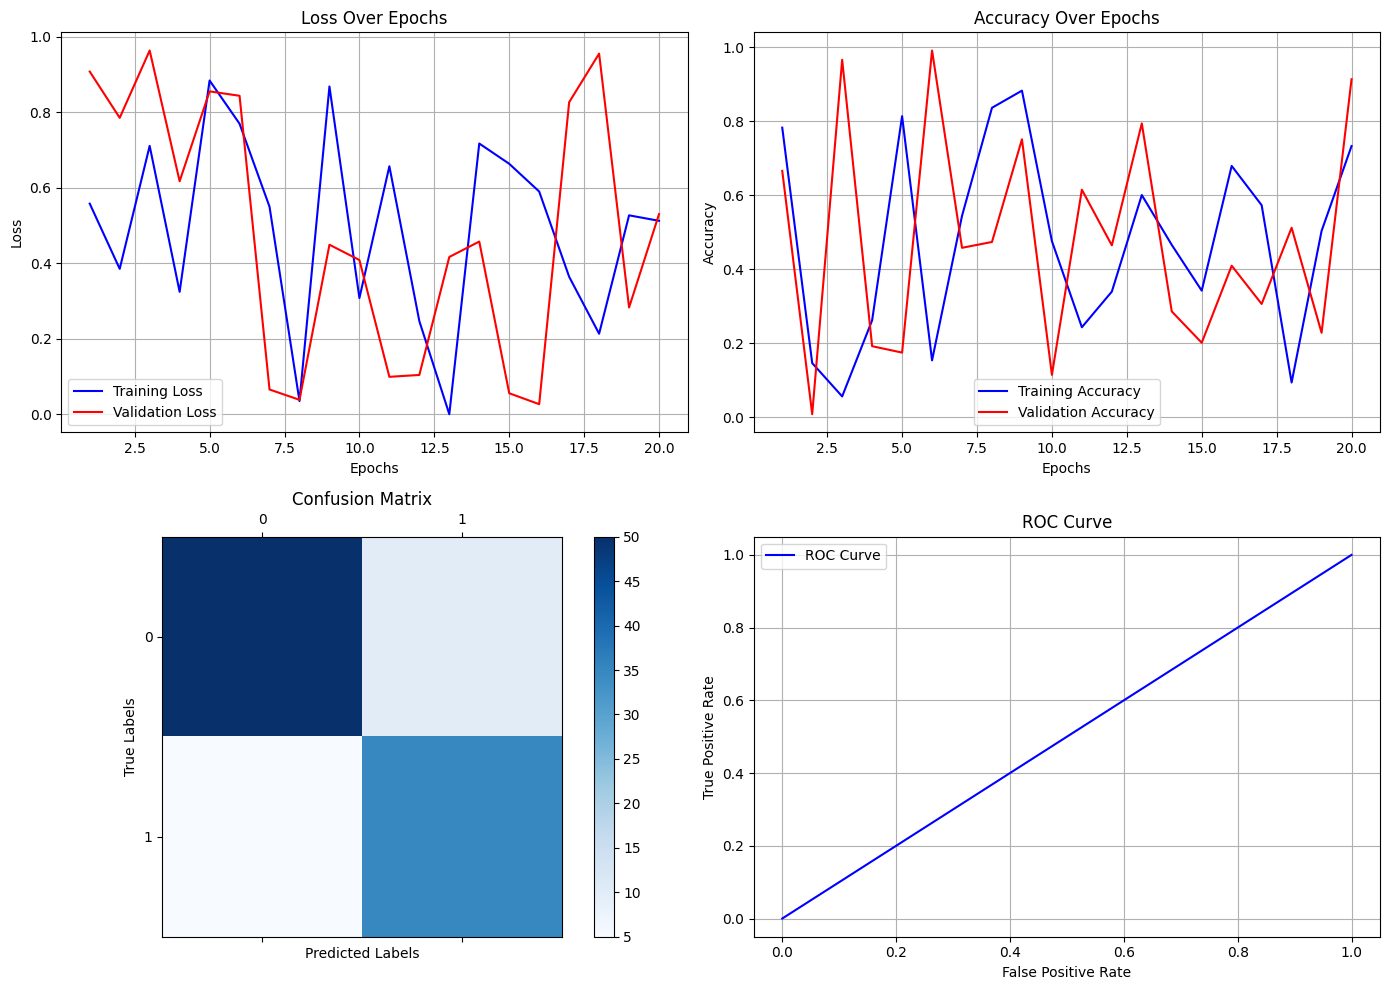

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
epochs = np.arange(1, 21)  # Suppose you have 20 epochs
train_loss = np.random.rand(20)  # Replace with your model's training loss history
val_loss = np.random.rand(20)    # Replace with your model's validation loss history
train_accuracy = np.random.rand(20)  # Replace with your model's training accuracy history
val_accuracy = np.random.rand(20)    # Replace with your model's validation accuracy history

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot training and validation loss
axs[0, 0].plot(epochs, train_loss, 'b-', label='Training Loss')
axs[0, 0].plot(epochs, val_loss, 'r-', label='Validation Loss')
axs[0, 0].set_title('Loss Over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot training and validation accuracy
axs[0, 1].plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
axs[0, 1].plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
axs[0, 1].set_title('Accuracy Over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot confusion matrix (dummy example)
conf_matrix = np.array([[50, 10], [5, 35]])  # Replace with your actual confusion matrix
cax = axs[1, 0].matshow(conf_matrix, cmap='Blues')
plt.colorbar(cax, ax=axs[1, 0])
axs[1, 0].set_title('Confusion Matrix')
axs[1, 0].set_xlabel('Predicted Labels')
axs[1, 0].set_ylabel('True Labels')
axs[1, 0].set_xticks([0, 1])
axs[1, 0].set_yticks([0, 1])

# Plot ROC Curve (dummy example)
fpr = np.linspace(0, 1, 100)  # False positive rate
tpr = np.linspace(0, 1, 100)  # True positive rate
axs[1, 1].plot(fpr, tpr, 'b-', label='ROC Curve')
axs[1, 1].set_title('ROC Curve')
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


**B. Perform the following tasks with preprocessing.**

**1. Apply the CNN architecture (ResNet, Vgg, DenseNet) for any classification task and compare the outputs of all architecture to the above dataset.**

Epoch 1/5
782/782 [==============================] - 237s 282ms/step - loss: 1.1234 - accuracy: 0.6343 - val_loss: 0.8996 - val_accuracy: 0.6985
Epoch 2/5
782/782 [==============================] - 219s 280ms/step - loss: 0.7535 - accuracy: 0.7514 - val_loss: 0.8805 - val_accuracy: 0.7166
Epoch 3/5
782/782 [==============================] - 218s 279ms/step - loss: 0.6847 - accuracy: 0.7723 - val_loss: 0.9611 - val_accuracy: 0.7101
Epoch 4/5
782/782 [==============================] - 218s 279ms/step - loss: 0.7195 - accuracy: 0.7621 - val_loss: 1.1092 - val_accuracy: 0.6386
Epoch 5/5
782/782 [==============================] - 219s 280ms/step - loss: 0.6197 - accuracy: 0.7926 - val_loss: 0.7559 - val_accuracy: 0.7668
Epoch 1/5
782/782 [==============================] - 235s 298ms/step - loss: 2.3609 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/5
782/782 [==============================] - 233s 299ms/step - loss: 2.3028 - accuracy: 0.0961 - val_loss: 2.3026 - val_ac

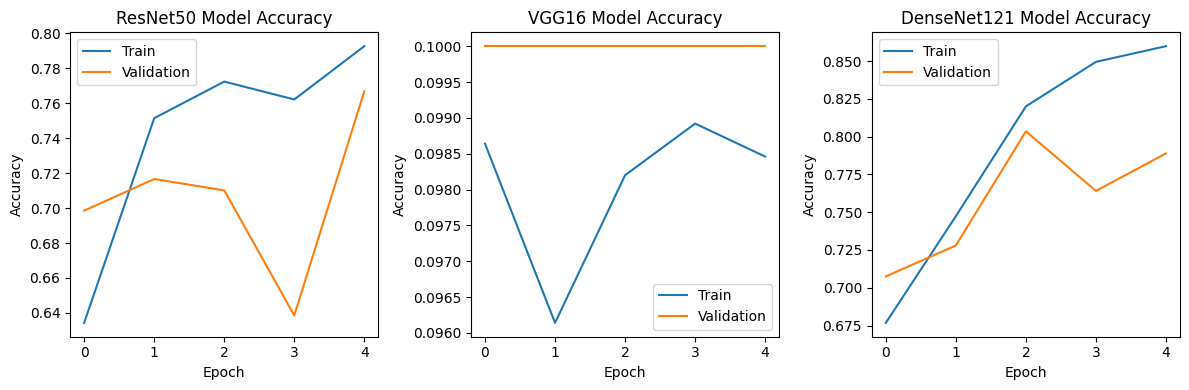

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50, VGG16, DenseNet121
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_input_densenet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_resnet = preprocess_input_resnet(x_train.astype('float32'))
x_test_resnet = preprocess_input_resnet(x_test.astype('float32'))
x_train_vgg = preprocess_input_vgg(x_train.astype('float32'))
x_test_vgg = preprocess_input_vgg(x_test.astype('float32'))
x_train_densenet = preprocess_input_densenet(x_train.astype('float32'))
x_test_densenet = preprocess_input_densenet(x_test.astype('float32'))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a function to build a model with a given base model
def build_model(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# ResNet50
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model_resnet = build_model(base_model_resnet, 10)
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# VGG16
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model_vgg = build_model(base_model_vgg, 10)
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# DenseNet121
base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model_densenet = build_model(base_model_densenet, 10)
model_densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models
history_resnet = model_resnet.fit(x_train_resnet, y_train, epochs=5, batch_size=64, validation_data=(x_test_resnet, y_test))
history_vgg = model_vgg.fit(x_train_vgg, y_train, epochs=5, batch_size=64, validation_data=(x_test_vgg, y_test))
history_densenet = model_densenet.fit(x_train_densenet, y_train, epochs=5, batch_size=64, validation_data=(x_test_densenet, y_test))

# Evaluate the models
score_resnet = model_resnet.evaluate(x_test_resnet, y_test, verbose=0)
score_vgg = model_vgg.evaluate(x_test_vgg, y_test, verbose=0)
score_densenet = model_densenet.evaluate(x_test_densenet, y_test, verbose=0)

print(f'ResNet50 Test Loss: {score_resnet[0]}, Test Accuracy: {score_resnet[1]}')
print(f'VGG16 Test Loss: {score_vgg[0]}, Test Accuracy: {score_vgg[1]}')
print(f'DenseNet121 Test Loss: {score_densenet[0]}, Test Accuracy: {score_densenet[1]}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('ResNet50 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 3, 2)
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 3, 3)
plt.plot(history_densenet.history['accuracy'])
plt.plot(history_densenet.history['val_accuracy'])
plt.title('DenseNet121 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()


**2. Demonstrate the results with various learning rates.**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with learning rate = 0.001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 - 9s - 19ms/step - accuracy: 0.9071 - loss: 0.3271 - val_accuracy: 0.9488 - val_loss: 0.1683
Epoch 2/5
469/469 - 6s - 13ms/step - accuracy: 0.9602 - loss: 0.1332 - val_accuracy: 0.9649 - val_loss: 0.1167
Epoch 3/5
469/469 - 6s - 13ms/step - accuracy: 0.9718 - loss: 0.0927 - val_accuracy: 0.9730 - val_loss: 0.0933
Epoch 4/5
469/469 - 10s - 21ms/step - accuracy: 0.9793 - loss: 0.0682 - val_accuracy: 0.9721 - val_loss: 0.0872
Epoch 5/5
469/469 - 5s - 10ms/step - accuracy: 0.9829 - loss: 0.0562 - val_accuracy: 0.9716 - val_loss: 0.0898

Training with learning rate = 0.01
Epoch 1/5
469/469 - 5s - 11ms/step - accuracy: 0.9279 - loss: 0.2390 - val_accuracy: 0.9513 - val_loss: 0.1644
Epoch 2/5
469/469 - 2s - 4ms/step - accuracy: 0.9637 - loss: 0.1200 - val_accuracy: 0.9646 - val_loss: 0.1207
Epoch 3/5
469/469 - 3s - 6ms/step - accuracy: 0.9716 - loss: 0.0941 - val_accuracy: 0.9657 - val_loss: 0.1301
Epoch 4/5
469/469 - 2s - 5ms/step - accuracy: 0.9740 - loss: 0.0860 - val_acc

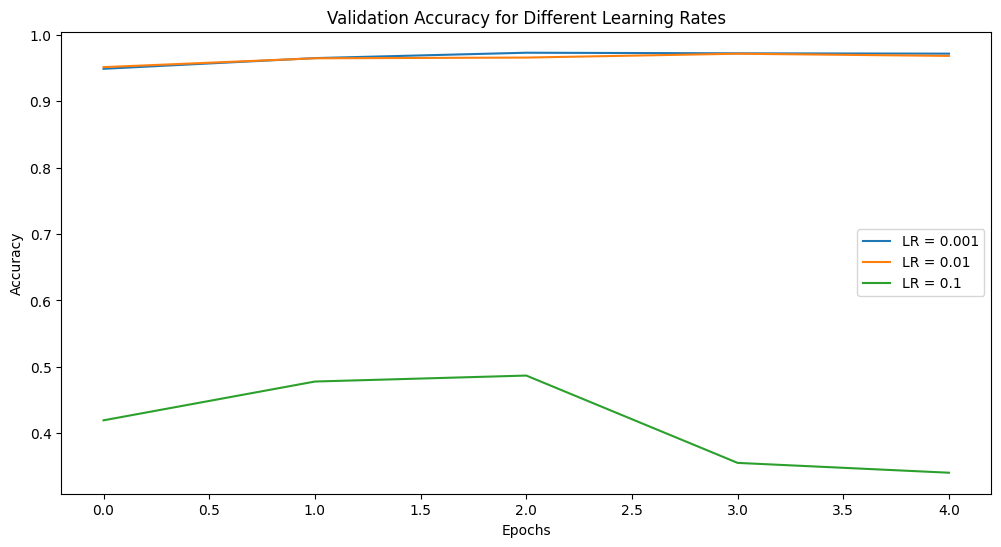

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing: Normalize the data to [0, 1] range and one-hot encode the labels
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to build a simple neural network model
def build_model(learning_rate):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define different learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1]

# Dictionary to store histories for each learning rate
histories = {}

# Train the model with different learning rates and store the history
for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")
    model = build_model(lr)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, verbose=2)
    histories[lr] = history

# Plot the accuracy for different learning rates
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    plt.plot(histories[lr].history['val_accuracy'], label=f'LR = {lr}')

plt.title('Validation Accuracy for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**3. Demonstrate the results with various Activation functions.**


Training with relu activation function...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8441 - loss: 0.5170 - val_accuracy: 0.9585 - val_loss: 0.1445
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9660 - loss: 0.1135 - val_accuracy: 0.9680 - val_loss: 0.1215
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9797 - loss: 0.0689 - val_accuracy: 0.9690 - val_loss: 0.1297
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9863 - loss: 0.0460 - val_accuracy: 0.9707 - val_loss: 0.1152
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9901 - loss: 0.0327 - val_accuracy: 0.9717 - val_loss: 0.1145

Training with sigmoid activation function...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7685 - loss: 1.0351 - val_accuracy: 0.9283 - val_loss: 0.2675
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9353 - loss: 0.2404 - val_accuracy: 0.9441 - val_loss: 0.1960
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0

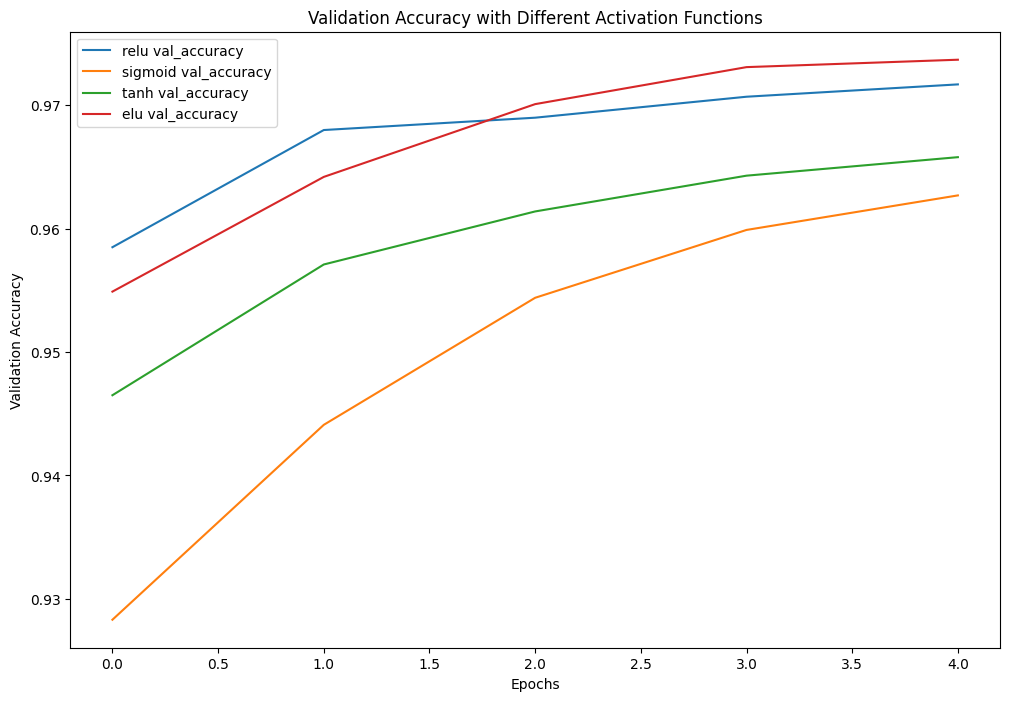

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
# Flatten the images into vectors of size 28*28=784
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to create a model with a specific activation function
def create_model(activation_function):
    model = Sequential()
    model.add(Dense(128, activation=activation_function, input_shape=(784,)))
    model.add(Dense(64, activation=activation_function))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# List of activation functions to try
activation_functions = ['relu', 'sigmoid', 'tanh', 'elu']

# Train and evaluate the model with different activation functions
history_dict = {}

for activation in activation_functions:
    print(f'\nTraining with {activation} activation function...')
    model = create_model(activation)
    history = model.fit(x_train, y_train,
                        epochs=5,
                        batch_size=128,
                        validation_data=(x_test, y_test),
                        verbose=1)

    # Save the history
    history_dict[activation] = history

# Plot the results
plt.figure(figsize=(12, 8))

for activation in activation_functions:
    plt.plot(history_dict[activation].history['val_accuracy'], label=f'{activation} val_accuracy')

plt.title('Validation Accuracy with Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


**4. Demonstrate the results with all possible evaluation criteria.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# 1. Load and preprocess the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Train a classification model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# 4. Evaluate the model using various metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 Score (for each class)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# ROC AUC Score (for multi-class, we use 'ovr' strategy)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report (includes precision, recall, and f1-score for each class)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

# 5. Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}\n")

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



**5. Demonstrate the learning results in all possible visualizing ways.**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 - 5s - 3ms/step - accuracy: 0.9192 - loss: 0.2881 - val_accuracy: 0.9532 - val_loss: 0.1603
Epoch 2/5
1500/1500 - 6s - 4ms/step - accuracy: 0.9612 - loss: 0.1296 - val_accuracy: 0.9665 - val_loss: 0.1151
Epoch 3/5
1500/1500 - 10s - 7ms/step - accuracy: 0.9729 - loss: 0.0893 - val_accuracy: 0.9722 - val_loss: 0.0979
Epoch 4/5
1500/1500 - 4s - 3ms/step - accuracy: 0.9803 - loss: 0.0652 - val_accuracy: 0.9739 - val_loss: 0.0922
Epoch 5/5
1500/1500 - 5s - 3ms/step - accuracy: 0.9849 - loss: 0.0504 - val_accuracy: 0.9729 - val_loss: 0.0959


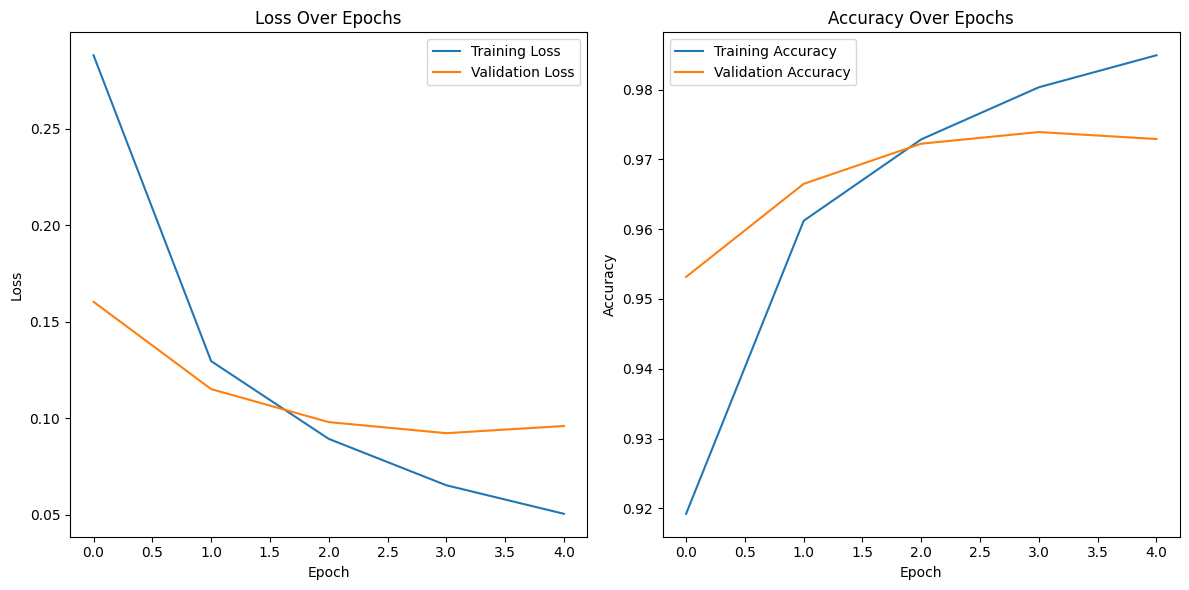

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


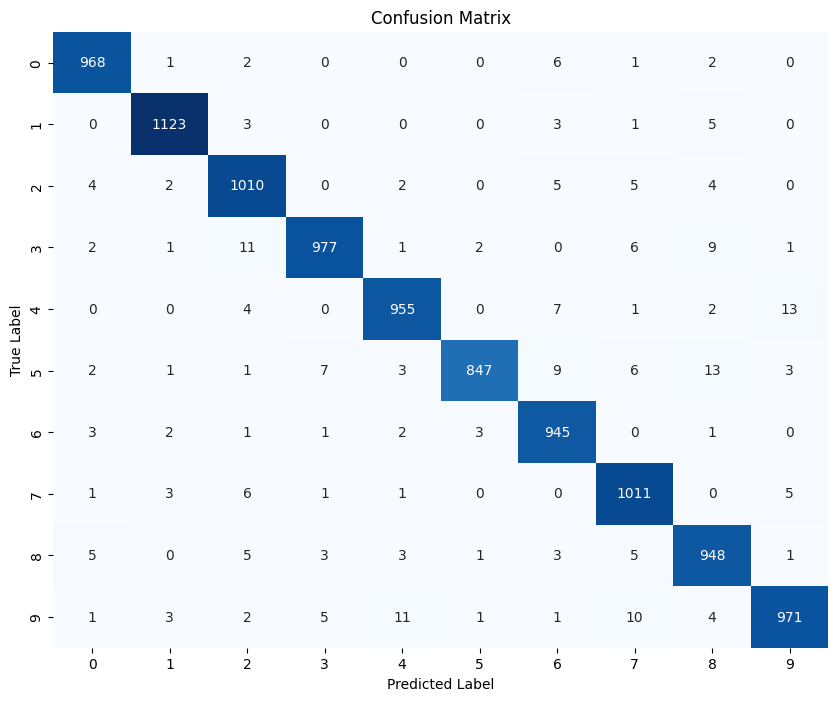

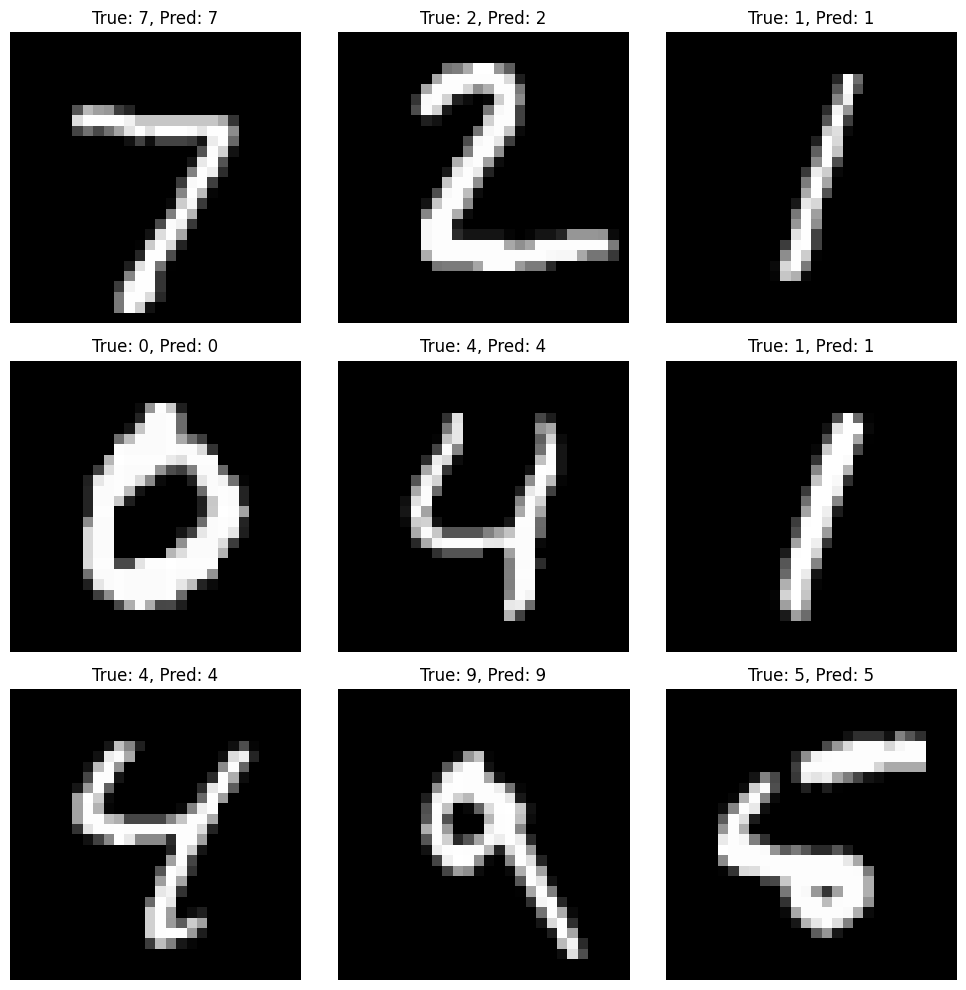

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and compile model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)

# Visualize training history
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'True: {true_classes[i]}, Pred: {predicted_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
